In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
df = pd.read_excel("SEC.xlsx", header=[0, 1], index_col=[0, 1, 2])

df.reset_index(inplace=True)

top_df = pd.merge(df["Empresa"], df[df.columns[3][0]]["% Valor"], right_index=True, left_index=True)

top_df.sort_values("% Valor", ascending=False, inplace=True)

In [3]:
def group_lower_ranking_values(column, quantile, df):
    
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row

    pie_counts = df.groupby(column).sum()
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(quantile)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    pie_grouped = df.apply(fix_values, axis=1).groupby(column).sum()    
    return pie_grouped
    

In [4]:
pie_sources = group_lower_ranking_values("Empresa", .8, top_df)

In [5]:
def plot_portfolio(pie_sources, quantile, column):
    sns.set(style="whitegrid")
    #sns.set_color_codes("Spectral")

    source_labels = pie_sources.loc[:, column].sort_values(ascending=False).index
    source_counts = pie_sources.loc[:, column].sort_values(ascending=False)

    source_data = pd.DataFrame(source_counts).reset_index()

    plt.figure(2, figsize=(20,15))
    the_grid = GridSpec(2, 2)

    plt.subplot(the_grid[0, 0],  title='Stocks hold in portfolio')
    sns.barplot(x=column,y='Empresa', data=source_data, palette='Spectral')


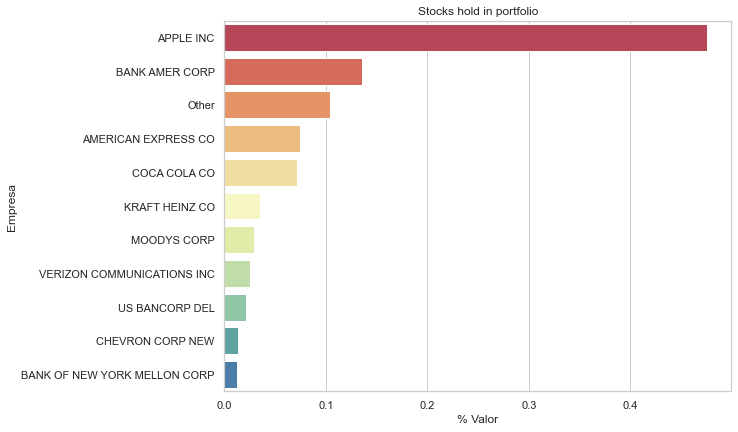

In [6]:
plot_portfolio(pie_sources, 0.8, "% Valor")